In [1]:
import torch
from lstm import PPO
from torch.distributions import Categorical
import numpy as np
import gymnasium as gym
from cell_env import CellEnv

In [2]:

env_args = {
    "max_timesteps": 1000,
    "alpha_mem": 0.7,
    "dt": 0.1,
    "frame_stack": 1,
}

env = CellEnv(**env_args)
# use the monitor wrapper to log the results:


In [3]:
model = PPO()
score = 0.0
print_interval = 4
T_horizon = 20
info = {}

for n_epi in range(10000):
    h_out = (torch.zeros([1, 1, 32], dtype=torch.float), torch.zeros([1, 1, 32], dtype=torch.float))
    s, _ = env.reset()
    done = False
    
    while not done:
        n_cells = 1000
        for t in range(T_horizon):
            h_in = h_out
            prob, h_out = model.pi(torch.from_numpy(s).float(), h_in)
            prob = prob.view(-1)
            m = Categorical(prob)
            a = m.sample().item()
            n_cells = info.get('n_cells', 1000)

            s_prime, r, terminated, truncated, info = env.step(a)
            done = terminated or truncated

            model.put_data((s, a, r/100.0, s_prime, prob[a].item(), h_in, h_out, done))
            s = s_prime
            score += r
            if done:
                print(n_cells)
                break
                
        model.train_net()

    if n_epi%print_interval==0 and n_epi!=0:
        print("# of episode :{}, avg score : {:.1f}".format(n_epi, score/print_interval))
        score = 0.0

env.close()


1000
1045.2221974340723
1045.2221974340723
958.802003833601
958.802003833601
# of episode :4, avg score : -0.4
958.802003833601
1018.627590033416
983.2667055430339
1013.9209823601685
# of episode :8, avg score : -0.3
958.802003833601
997.265608951365
1028.6198593994961
1045.2221974340723
# of episode :12, avg score : -0.3
958.802003833601
1018.627590033416
1045.2221974340723
1045.2221974340723
# of episode :16, avg score : -0.4
1045.2221974340723
958.802003833601
983.4119088115432


/home/jacob/Desktop/Github/iaifi24-hackathon/lstm.py:60: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  s,a,r,s_prime,done_mask,prob_a = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \


997.7341327510525
# of episode :20, avg score : -0.2
1018.2020487209767
972.4647082051674
1005.9900142967635
958.802003833601
# of episode :24, avg score : -0.3
958.802003833601
1018.627590033416
1045.2221974340723
958.802003833601
# of episode :28, avg score : -0.3
993.6257670314453
1026.7824644196103
993.6257670314453
958.802003833601
# of episode :32, avg score : -0.3
1018.627590033416
958.802003833601
972.4647082051674
958.802003833601
# of episode :36, avg score : -0.2
958.802003833601
1018.627590033416
958.802003833601
1018.627590033416
# of episode :40, avg score : -0.3
1045.2221974340723
958.802003833601
958.802003833601
1018.627590033416
# of episode :44, avg score : -0.3
993.6257670314453
958.802003833601
1018.627590033416
958.802003833601
# of episode :48, avg score : -0.3
958.802003833601
958.802003833601
1018.627590033416
958.802003833601
# of episode :52, avg score : -0.2
1018.627590033416
1045.2221974340723
1045.2221974340723
958.802003833601
# of episode :56, avg score 

In [6]:
cells = []
done = False

env.reset()
while not done:
    n_cells = 1000
    # for t in range(T_horizon):
    h_in = h_out
    prob, h_out = model.pi(torch.from_numpy(s).float(), h_in)
    prob = prob.view(-1)
    # get max prob action
    a = np.argmax(prob.detach().numpy())
    cells.append(info['n_cells'])

    s_prime, r, terminated, truncated, info = env.step(a)
    done = terminated or truncated

    s = s_prime
    score += r



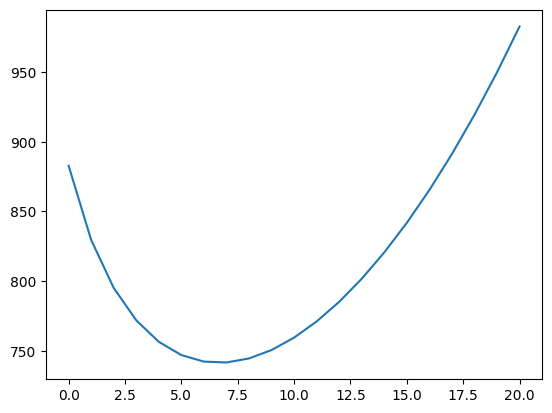

In [7]:
import matplotlib.pyplot as plt
plt.plot(cells[1:])